# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 15.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 16.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 11.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 391 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [9]:
client = MongoClient(mongod_connect)
db = client.gp20 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [10]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [11]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [12]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1323343132411527172
1323343132738637830
1323343133539815424
1323343133720064000
1323343133887791104
1323343134324105216
1323343133820805122
1323343134458302464
1323343135330738178
1323343135565598725
1323343136136040450
1323343136354164737
1323343136433864706
1323343136861683713
1323343137163612160
1323343137830559744
1323343138178682881
1323343138493181953
1323343138753286151
1323343139042709504
1323343140154150913
1323343140284223489
1323343140334555138
1323343140598829056
1323343140925919234
1323343140795879426
1323343141030735872
1323343143010525187
1323343142985281536
1323343143442518017
1323343143316660224
1323343143534809088
1323343144398819334
1323343144570785793
1323343145480966146
1323343146265305094
1323343147108282370
1323343147229995011
1323343148404322307
1323343148538580993
1323343149029298176
1323343149217898497
1323343150967148548
1323343151084568576
1323343153630486528
1323343153622061059
1323343153961775108
1323343154020573185
1323343154838425606
1323343155186573313


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 02 19:18:15 +0000 2020'
'Mon Nov 02 19:18:15 +0000 2020'
'Mon Nov 02 19:18:15 +0000 2020'
'Mon Nov 02 19:18:15 +0000 2020'
'Mon Nov 02 19:18:15 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:14 +0000 2020'
'Mon Nov 02 19:18:13 +0000 2020'
'Mon Nov 02 19:18:13 +0000 2020'
'Mon Nov 02 19:18:13 +0000 2020'
'Mon Nov 02 19:18:13 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:12 +0000 2020'
'Mon Nov 02 19:18:11 +0000 2020'
'Mon Nov 02 19:18:11 +0000 2020'
'Mon Nov 02 19:18:11 +0000 2020'
'Mon Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 02 19:17:56 +0000 2020'
'Mon Nov 02 19:17:56 +0000 2020'
'Mon Nov 02 19:17:56 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:55 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:54 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 02 19:17:53 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:17:10 +0000 2020'
'Mon Nov 02 19:17:10 +0000 2020'
'Mon Nov 02 19:17:10 +0000 2020'
'Mon Nov 02 19:17:09 +0000 2020'
'Mon Nov 02 19:17:09 +0000 2020'
'Mon Nov 02 19:17:09 +0000 2020'
'Mon Nov 02 19:17:09 +0000 2020'
'Mon Nov 02 19:17:09 +0000 2020'
'Mon Nov 02 19:17:08 +0000 2020'
'Mon Nov 02 19:17:08 +0000 2020'
'Mon Nov 02 19:17:08 +0000 2020'
'Mon Nov 02 19:17:08 +0000 2020'
'Mon Nov 02 19:17:08 +0000 2020'
'Mon Nov 02 19:17:08 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:07 +0000 2020'
'Mon Nov 02 19:17:06 +0000 2020'
'Mon Nov 02 19:17:06 +0000 2020'
'Mon Nov 02 19:17:06 +0000 2020'
'Mon Nov 02 19:17:06 +0000 2020'
'Mon Nov 02 19:17:06 +0000 2020'
'Mon Nov 02 19:17:06 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:15:51 +0000 2020'
'Mon Nov 02 19:15:51 +0000 2020'
'Mon Nov 02 19:15:51 +0000 2020'
'Mon Nov 02 19:15:51 +0000 2020'
'Mon Nov 02 19:15:50 +0000 2020'
'Mon Nov 02 19:15:50 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:49 +0000 2020'
'Mon Nov 02 19:15:48 +0000 2020'
'Mon Nov 02 19:15:48 +0000 2020'
'Mon Nov 02 19:15:48 +0000 2020'
'Mon Nov 02 19:15:48 +0000 2020'
'Mon Nov 02 19:15:48 +0000 2020'
'Mon Nov 02 19:15:48 +0000 2020'
'Mon Nov 02 19:15:47 +0000 2020'
'Mon Nov 02 19:15:47 +0000 2020'
'Mon Nov 02 19:15:47 +0000 2020'
'Mon Nov 02 19:15:47 +0000 2020'
'Mon Nov 02 19:15:47 +0000 2020'
'Mon Nov 02 19:15:46 +0000 2020'
'Mon Nov 02 19:15:46 +0000 2020'
'Mon Nov 02 19:15:46 +0000 2020'
'Mon Nov 02 19:15:46 +0000 2020'
'Mon Nov 02 19:15:46 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:15:06 +0000 2020'
'Mon Nov 02 19:15:06 +0000 2020'
'Mon Nov 02 19:15:06 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:05 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:04 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 02 19:15:03 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:14:22 +0000 2020'
'Mon Nov 02 19:14:22 +0000 2020'
'Mon Nov 02 19:14:22 +0000 2020'
'Mon Nov 02 19:14:22 +0000 2020'
'Mon Nov 02 19:14:21 +0000 2020'
'Mon Nov 02 19:14:21 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:20 +0000 2020'
'Mon Nov 02 19:14:19 +0000 2020'
'Mon Nov 02 19:14:19 +0000 2020'
'Mon Nov 02 19:14:19 +0000 2020'
'Mon Nov 02 19:14:19 +0000 2020'
'Mon Nov 02 19:14:19 +0000 2020'
'Mon Nov 02 19:14:19 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:18 +0000 2020'
'Mon Nov 02 19:14:17 +0000 2020'
'Mon Nov 02 19:14:17 +0000 2020'
'Mon Nov 02 19:14:17 +0000 2020'
'Mon Nov 02 19:14:17 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:13:40 +0000 2020'
'Mon Nov 02 19:13:40 +0000 2020'
'Mon Nov 02 19:13:40 +0000 2020'
'Mon Nov 02 19:13:40 +0000 2020'
'Mon Nov 02 19:13:40 +0000 2020'
'Mon Nov 02 19:13:39 +0000 2020'
'Mon Nov 02 19:13:39 +0000 2020'
'Mon Nov 02 19:13:39 +0000 2020'
'Mon Nov 02 19:13:39 +0000 2020'
'Mon Nov 02 19:13:38 +0000 2020'
'Mon Nov 02 19:13:38 +0000 2020'
'Mon Nov 02 19:13:37 +0000 2020'
'Mon Nov 02 19:13:37 +0000 2020'
'Mon Nov 02 19:13:37 +0000 2020'
'Mon Nov 02 19:13:37 +0000 2020'
'Mon Nov 02 19:13:37 +0000 2020'
'Mon Nov 02 19:13:36 +0000 2020'
'Mon Nov 02 19:13:36 +0000 2020'
'Mon Nov 02 19:13:36 +0000 2020'
'Mon Nov 02 19:13:36 +0000 2020'
'Mon Nov 02 19:13:36 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:35 +0000 2020'
'Mon Nov 02 19:13:34 +0000 2020'
'Mon Nov 02 19:13:34 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:12:57 +0000 2020'
'Mon Nov 02 19:12:57 +0000 2020'
'Mon Nov 02 19:12:56 +0000 2020'
'Mon Nov 02 19:12:56 +0000 2020'
'Mon Nov 02 19:12:56 +0000 2020'
'Mon Nov 02 19:12:55 +0000 2020'
'Mon Nov 02 19:12:55 +0000 2020'
'Mon Nov 02 19:12:55 +0000 2020'
'Mon Nov 02 19:12:55 +0000 2020'
'Mon Nov 02 19:12:55 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:54 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:53 +0000 2020'
'Mon Nov 02 19:12:52 +0000 2020'
'Mon Nov 02 19:12:52 +0000 2020'
'Mon Nov 02 19:12:52 +0000 2020'
'Mon Nov 02 19:12:52 +0000 2020'
'Mon Nov 02 19:12:52 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:09 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:08 +0000 2020'
'Mon Nov 02 19:12:07 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:06 +0000 2020'
'Mon Nov 02 19:12:05 +0000 2020'
'Mon Nov 02 19:12:05 +0000 2020'
'Mon Nov 02 19:12:05 +0000 2020'
'Mon Nov 02 19:12:05 +0000 2020'
'Mon Nov 02 19:12:05 +0000 2020'
'Mon Nov 02 19:12:04 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:11:19 +0000 2020'
'Mon Nov 02 19:11:19 +0000 2020'
'Mon Nov 02 19:11:19 +0000 2020'
'Mon Nov 02 19:11:19 +0000 2020'
'Mon Nov 02 19:11:19 +0000 2020'
'Mon Nov 02 19:11:19 +0000 2020'
'Mon Nov 02 19:11:18 +0000 2020'
'Mon Nov 02 19:11:18 +0000 2020'
'Mon Nov 02 19:11:18 +0000 2020'
'Mon Nov 02 19:11:18 +0000 2020'
'Mon Nov 02 19:11:18 +0000 2020'
'Mon Nov 02 19:11:18 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:17 +0000 2020'
'Mon Nov 02 19:11:16 +0000 2020'
'Mon Nov 02 19:11:16 +0000 2020'
'Mon Nov 02 19:11:16 +0000 2020'
'Mon Nov 02 19:11:16 +0000 2020'
'Mon Nov 02 19:11:15 +0000 2020'
'Mon Nov 02 19:11:15 +0000 2020'
'Mon Nov 02 19:11:15 +0000 2020'
'Mon Nov 02 19:11:15 +0000 2020'
'Mon Nov 02 19:11:15 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:10:31 +0000 2020'
'Mon Nov 02 19:10:31 +0000 2020'
'Mon Nov 02 19:10:31 +0000 2020'
'Mon Nov 02 19:10:31 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:30 +0000 2020'
'Mon Nov 02 19:10:29 +0000 2020'
'Mon Nov 02 19:10:29 +0000 2020'
'Mon Nov 02 19:10:29 +0000 2020'
'Mon Nov 02 19:10:29 +0000 2020'
'Mon Nov 02 19:10:29 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:28 +0000 2020'
'Mon Nov 02 19:10:27 +0000 2020'
'Mon Nov 02 19:10:27 +0000 2020'
'Mon Nov 02 19:10:27 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:09:45 +0000 2020'
'Mon Nov 02 19:09:45 +0000 2020'
'Mon Nov 02 19:09:45 +0000 2020'
'Mon Nov 02 19:09:45 +0000 2020'
'Mon Nov 02 19:09:45 +0000 2020'
'Mon Nov 02 19:09:44 +0000 2020'
'Mon Nov 02 19:09:44 +0000 2020'
'Mon Nov 02 19:09:44 +0000 2020'
'Mon Nov 02 19:09:44 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:43 +0000 2020'
'Mon Nov 02 19:09:42 +0000 2020'
'Mon Nov 02 19:09:42 +0000 2020'
'Mon Nov 02 19:09:42 +0000 2020'
'Mon Nov 02 19:09:42 +0000 2020'
'Mon Nov 02 19:09:41 +0000 2020'
'Mon Nov 02 19:09:41 +0000 2020'
'Mon Nov 02 19:09:41 +0000 2020'
'Mon Nov 02 19:09:41 +0000 2020'
'Mon Nov 02 19:09:40 +0000 2020'
'Mon Nov 02 19:09:40 +0000 2020'
'Mon Nov 02 19:09:40 +0000 2020'
'Mon Nov 02 19:09:40 +0000 2020'
'Mon Nov 02 19:09:39 +0000 2020'
'Mon Nov 02 19:09:39 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:09:00 +0000 2020'
'Mon Nov 02 19:08:59 +0000 2020'
'Mon Nov 02 19:08:59 +0000 2020'
'Mon Nov 02 19:08:59 +0000 2020'
'Mon Nov 02 19:08:58 +0000 2020'
'Mon Nov 02 19:08:58 +0000 2020'
'Mon Nov 02 19:08:57 +0000 2020'
'Mon Nov 02 19:08:57 +0000 2020'
'Mon Nov 02 19:08:57 +0000 2020'
'Mon Nov 02 19:08:57 +0000 2020'
'Mon Nov 02 19:08:57 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:56 +0000 2020'
'Mon Nov 02 19:08:55 +0000 2020'
'Mon Nov 02 19:08:55 +0000 2020'
'Mon Nov 02 19:08:55 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:08:20 +0000 2020'
'Mon Nov 02 19:08:20 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:19 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:18 +0000 2020'
'Mon Nov 02 19:08:17 +0000 2020'
'Mon Nov 02 19:08:17 +0000 2020'
'Mon Nov 02 19:08:17 +0000 2020'
'Mon Nov 02 19:08:17 +0000 2020'
'Mon Nov 02 19:08:16 +0000 2020'
'Mon Nov 02 19:08:16 +0000 2020'
'Mon Nov 02 19:08:16 +0000 2020'
'Mon Nov 02 19:08:16 +0000 2020'
'Mon Nov 02 19:08:15 +0000 2020'
'Mon Nov 02 19:08:15 +0000 2020'
'Mon Nov 02 19:08:15 +0000 2020'
'Mon Nov 02 19:08:15 +0000 2020'
'Mon Nov 02 19:08:15 +0000 2020'
'Mon Nov 0

'Mon Nov 02 19:07:35 +0000 2020'
'Mon Nov 02 19:07:35 +0000 2020'
'Mon Nov 02 19:07:35 +0000 2020'
'Mon Nov 02 19:07:35 +0000 2020'
'Mon Nov 02 19:07:35 +0000 2020'
'Mon Nov 02 19:07:35 +0000 2020'
'Mon Nov 02 19:07:34 +0000 2020'
'Mon Nov 02 19:07:34 +0000 2020'
'Mon Nov 02 19:07:34 +0000 2020'
'Mon Nov 02 19:07:34 +0000 2020'
'Mon Nov 02 19:07:34 +0000 2020'
'Mon Nov 02 19:07:33 +0000 2020'
'Mon Nov 02 19:07:33 +0000 2020'
'Mon Nov 02 19:07:33 +0000 2020'
'Mon Nov 02 19:07:32 +0000 2020'
'Mon Nov 02 19:07:32 +0000 2020'
'Mon Nov 02 19:07:32 +0000 2020'
'Mon Nov 02 19:07:32 +0000 2020'
'Mon Nov 02 19:07:32 +0000 2020'
'Mon Nov 02 19:07:31 +0000 2020'
'Mon Nov 02 19:07:31 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:30 +0000 2020'
'Mon Nov 02 19:07:29 +0000 2020'
'Mon Nov 02 19:07:29 +0000 2020'
'Mon Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

22009
18432


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Kimberly Ferguson
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: EDPA
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: #StayHome
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: NCoC - Say #ThankYouElectionHeroes on Nov. 2nd
text: RT @GovernorKayIvey: Due to #COVID19, all of us, especially our election workers, have spent months adapting &amp; preparing for the election.…
----
name: SKY Of Padilla a.k.a. PADILLA a.k.a. JD Aeon
text: US ELECTIONS...
Somebody asked me - So... WHO do you think will WIN in this 2020 US Election? I paused for a bit of… https://t.co/yYFMeAj213
----
name: Enzo
text: Speaker @Chronicle Covid19 webinar predicts turmoil

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,filter_level,timestamp_ms,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,quoted_status_permalink,extended_tweet,display_text_range
0,5fa05be89b1f50706380b016,Mon Nov 02 19:09:37 +0000 2020,1323341512701284353,1323341512701284353,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa05be19b1f50706380adbf,Mon Nov 02 19:11:23 +0000 2020,1323341958044110849,1323341958044110849,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa05be19b1f50706380adbb,Mon Nov 02 19:11:25 +0000 2020,1323341963664478210,1323341963664478210,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa05b079b1f50706380a3a6,Mon Nov 02 19:16:18 +0000 2020,1323343193778212865,1323343193778212865,"RT @GovernorKayIvey: Due to #COVID19, all of u...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,low,1604344578581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa04dfe7a57c3f3cb4262a8,Mon Nov 02 17:37:07 +0000 2020,1323318232405680131,1323318232405680131,US ELECTIONS...\nSomebody asked me - So... WHO...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa04db47a57c3f3cb424738,Mon Nov 02 17:57:11 +0000 2020,1323323285166264320,1323323285166264320,Speaker @Chronicle Covid19 webinar predicts tu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa04e0c7a57c3f3cb4267c7,Mon Nov 02 17:33:21 +0000 2020,1323317285168271363,1323317285168271363,@realDonaldTrump The election is between Covid...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.323156e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa04d667a57c3f3cb422a60,Mon Nov 02 18:16:39 +0000 2020,1323328183228370947,1323328183228370947,U.S. election stalls global #COVID19\nfight: h...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa04e057a57c3f3cb426551,Mon Nov 02 17:35:04 +0000 2020,1323317715571015681,1323317715571015681,It could be that cities like DC are boarding u...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,False,1.323315e+18,1323315053492404225,{'created_at': 'Mon Nov 02 17:24:29 +0000 2020...,NaN,NaN,NaN,NaN
9,5fa04e047a57c3f3cb4264ec,Mon Nov 02 17:35:20 +0000 2020,1323317786165338113,1323317786165338113,RT @batirw: In a strange irony the government ...,False,"{'hashtags': [{'text': 'Jordan', 'indices': [4...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


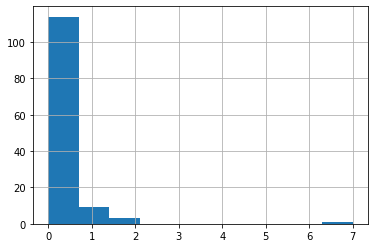

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count